In [1]:
import pickle
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
plt.style.use('science')

from pepsflow.iPEPS_trainer import iPEPSTrainer

In [3]:
lambda_values = [lam for lam in np.arange(0.1, 4.25, 0.25)]
chi_values = [6, 8, 12, 18]
for chi in chi_values:
    trainer = iPEPSTrainer(chi = chi, d = 2, gpu=False)
    trainer.exe(lambda_values, tol=1e-8, max_epochs=50, use_prev=False)
    trainer.save_data(fn = f"run4/chi{chi}")

 88%|████████▊ | 15/17 [00:27<00:03,  1.99s/it]

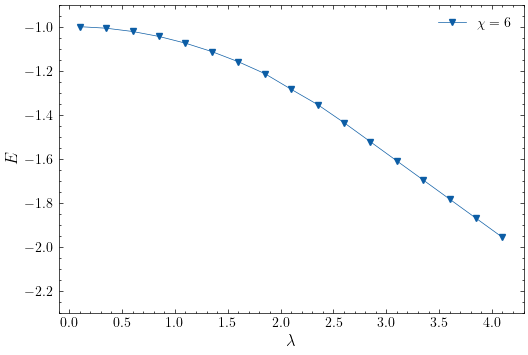

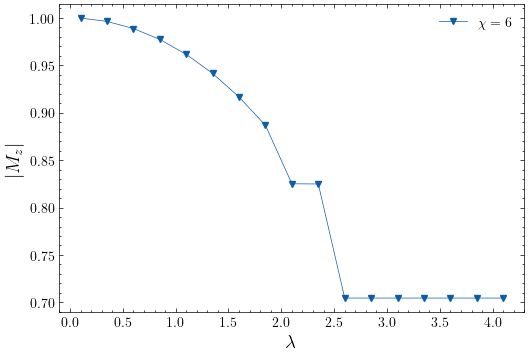

In [4]:


plt.figure(figsize=(6, 4))
for chi in chi_values[:1]:
    with open(f"data/run4/chi{chi}.pkl", 'rb') as f:
        data = pickle.load(f)
    plt.plot(lambda_values, data["energies"], 'v-', markersize=4, linewidth=0.5, label=rf'$\chi = {chi}$')

plt.legend()
plt.ylim(-2.3, -0.9)
plt.xlabel(r"$\lambda$", fontsize=12)
plt.ylabel(r'$E$', fontsize=12)
plt.show()

plt.figure(figsize=(6, 4))
for chi in chi_values[:1]:
    with open(f"data/run4/chi{chi}.pkl", 'rb') as f:
        data = pickle.load(f)
    plt.plot(lambda_values, abs(np.array(data['Mz'])), 'v-', markersize=4, linewidth=0.5, label=rf'$\chi = {chi}$')
plt.legend()
plt.xlabel(r"$\lambda$", fontsize=14)
plt.ylabel(r'$|M_z|$', fontsize=14)
plt.show()